<a href="https://colab.research.google.com/github/pseudope/2021_F_Level2/blob/main/Projects/2%EC%A1%B0/3i4k_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data read

In [ ]:
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt

--2021-09-30 07:35:17--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661060 (2.5M) [text/plain]
Saving to: ‘fci_train_val.txt’

fci_train_val.txt   100%[===================>]   2.54M  --.-KB/s    in 0.07s   

2021-09-30 07:35:18 (38.9 MB/s) - ‘fci_train_val.txt’ saved [2661060/2661060]

--2021-09-30 07:35:18--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
def read_data(filename):

    with open(filename, "r", encoding="UTF8") as f:
        data = [line.split("\t") for line in f.read().splitlines()]

    return data

In [ ]:
train_data = read_data("/content/fci_train_val.txt")
X_train_data = [t[1] for t in train_data]
y_train_data = [int(t[0]) for t in train_data]

test_data = read_data("/content/fci_test.txt")
X_test_data = [t[1] for t in test_data]
y_test_data = [int(t[0]) for t in test_data]

# 데이터 확인

In [ ]:
print(len(X_train_data))
print(len(y_train_data))
print(len(X_test_data))
print(len(y_test_data))

55134
55134
6121
6121


In [ ]:
from collections import Counter
result=Counter(y_train_data)
for key in result:
  print(key, result[key])

0 5409
1 16470
2 16083
3 11672
4 1571
5 979
6 2950


In [ ]:
X_train_data[-10:-1]

['빌라는 잘 안 팔려 아파트 살 거야',
 '잘 도착했다고 전화 왔어 ',
 '누가 먹어',
 '지난번 배운 곳 요점정리 해봤어',
 '끝내기만 하고 그냥 왔어',
 '언제 얘기해봤어',
 '또 사기 당했어',
 '물 좋아',
 '몇 개 먹을래']

In [ ]:
y_train_data[-10:-1]

[6, 6, 6, 6, 6, 6, 6, 6, 6]

# 토큰화

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 42.5 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import nltk
from konlpy.tag import Twitter

In [ ]:
# 문장을 형태소 단위로 분리
twitter=Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
X_train=[twitter.morphs(row) for row in X_train_data]

# 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# 정수 인코딩
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.word_index

{'에': 1,
 '이': 2,
 '가': 3,
 '을': 4,
 '메일': 5,
 '은': 6,
 '오늘': 7,
 '를': 8,
 '알려줘': 9,
 '해줘': 10,
 '는': 11,
 '의': 12,
 '해': 13,
 '있니': 14,
 '내일': 15,
 '에서': 16,
 '이번': 17,
 '로': 18,
 '좀': 19,
 '한': 20,
 '수': 21,
 '몇': 22,
 '들': 23,
 '도': 24,
 '언제': 25,
 '일정': 26,
 '으로': 27,
 '주': 28,
 '확인': 29,
 '온': 30,
 '안': 31,
 '다': 32,
 '내': 33,
 '날씨': 34,
 '나': 35,
 '니': 36,
 '지': 37,
 '잘': 38,
 '거': 39,
 '것': 40,
 '그': 41,
 '있는': 42,
 '시간': 43,
 '달': 44,
 '야': 45,
 '할': 46,
 '있어': 47,
 '뭐': 48,
 '까지': 49,
 '하는': 50,
 '지금': 51,
 '비': 52,
 '일': 53,
 '너': 54,
 '추가': 55,
 '날': 56,
 '시': 57,
 '하고': 58,
 '모두': 59,
 '말': 60,
 '때': 61,
 '약속': 62,
 '사람': 63,
 '만': 64,
 '많이': 65,
 '게': 66,
 '왜': 67,
 '너무': 68,
 '다음주': 69,
 '못': 70,
 '불': 71,
 '오후': 72,
 '함': 73,
 '다음': 74,
 '고': 75,
 '우리': 76,
 '요': 77,
 '중': 78,
 '어디': 79,
 '어제': 80,
 '와': 81,
 '집': 82,
 '더': 83,
 '회사': 84,
 '님': 85,
 '인지': 86,
 '눈': 87,
 '과': 88,
 '얼마나': 89,
 '어떻게': 90,
 '이야': 91,
 '온도': 92,
 '입니다': 93,
 '검색': 94,
 '저녁': 95,
 '적': 96,
 '삭

In [ ]:
tokenizer.word_counts

OrderedDict([('만화', 7),
             ('이치', 2),
             ('가', 6597),
             ('약', 121),
             ('그', 995),
             ('사이', 84),
             ('짜긴', 1),
             ('혜택', 43),
             ('지출', 8),
             ('어젯밤', 69),
             ('승진', 17),
             ('꼬마', 6),
             ('신청', 83),
             ('엄마', 349),
             ('꼭', 305),
             ('어어', 3),
             ('그게', 70),
             ('브로', 1),
             ('셔', 10),
             ('보여준다는', 1),
             ('게', 724),
             ('김밥', 19),
             ('끝내', 7),
             ('대학', 42),
             ('손잡이', 2),
             ('참여', 43),
             ('군', 29),
             ('차차', 1),
             ('집안일', 7),
             ('내내', 27),
             ('싸', 16),
             ('들고', 31),
             ('그냥', 234),
             ('구별', 3),
             ('시합', 7),
             ('글자', 21),
             ('비슷한', 20),
             ('의사', 18),
             ('그래', 156),
             ('여군', 1),
       

In [ ]:
# 한 번밖에 등장하지 않는 단어
rare_word=[x for x, y in tokenizer.word_counts.items() if y==1]

In [ ]:
rare_cnt=len(rare_word)
rare_cnt

16082

In [ ]:
total_cnt=len(tokenizer.word_index) # 전체 단어의 절반 이상이 한 번밖에 등장하지 않음
total_cnt

31455

In [ ]:
sum([y for x, y in tokenizer.word_counts.items()])  # 전체 문장의 등장 빈도는 낮음

381803

In [ ]:
# 한 번 등장하는 단어 제외 & 0번 패딩과 1번 OOV 추가
tokenizer=Tokenizer(total_cnt-rare_cnt+2, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train=tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train[-5:-1]

[[26, 284, 5854], [243, 1495, 7697], [346, 244], [23, 203, 15311]]

In [ ]:
X_train_data[-5:-1]

['언제 얘기해봤어', '또 사기 당했어', '물 좋아', '몇 개 먹을래']

# 패딩

In [ ]:
max(len(l) for l in X_train)

50

In [ ]:
sum(map(len, X_train))/len(X_train)

6.925000906881416

In [ ]:
import matplotlib.pyplot as plt

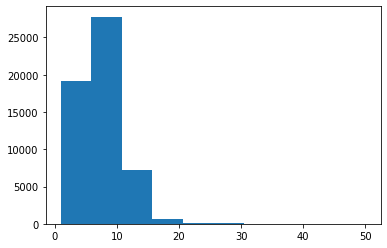

In [ ]:
plt.hist([len(l) for l in X_train])
plt.show()

In [ ]:
len([l for l in X_train if len(l)>40])

5

In [ ]:
len(X_train)

55134

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 50으로 padding
# 한국어 특성상 문장 끝이 중요하므로 오른쪽에 치우치게 패딩
X_train_pad=pad_sequences(X_train, maxlen=50)

In [ ]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 4688], dtype=int32)

In [ ]:
X_train_pad[-1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    8,
         73,    2, 4584, 1168,  120,   14], dtype=int32)

In [ ]:
max([y for x, y in tokenizer.word_counts.items()])

10212

In [ ]:
[(x, y) for x, y in tokenizer.word_counts.items() if y>9000]

[('이', 9682), ('에', 10212)]

# 원-핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(y_train_data.count)

<built-in method count of list object at 0x7f6528b97be0>


In [ ]:
y_train=to_categorical(y_train_data)

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[-1]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train.shape

(55134, 7)

In [ ]:
X_train_pad.shape

(55134, 50)